In [1]:
import cv2
import numpy as np
import os
import errno
from PIL import Image

## Resize and format images

In [6]:
# Load pixel image database and resize
path = os.path.join(os.path.dirname(os.getcwd()),"data")
height = 240
aspect_ratio = 1 # ratio of height to width

if not os.path.exists('data_resized'):
    try:
        os.makedirs('../data_resized')
    except OSError as e:
        if e.errno != errno.EEXIST:
            raise

for file in os.listdir(path):
    if (os.path.splitext(file)[-1] != ".jpg"):
        continue
    img = Image.open(os.path.join(path,file))
    if (img.height>=img.width*aspect_ratio):
        crop_area = (0,(img.height-aspect_ratio*img.width)/2,img.width,(img.height+aspect_ratio*img.width)/2)
    else:
        crop_area = ((img.width-1/aspect_ratio*img.height)/2,0,(img.width+1/aspect_ratio*img.height)/2,img.height)
    
    img=img.crop(crop_area)
    img = img.resize((round(height/aspect_ratio),height),Image.ANTIALIAS)
    img.save(os.path.join(os.path.dirname(os.getcwd()),"data_resized",file))

## Find large areas of same color

In [8]:
# Fourier transform of pixel images
# Sort based on criterion - color

if not os.path.exists('data_resized_eroded'):
    try:
        os.makedirs('../data_resized_eroded')
    except OSError as e:
        if e.errno != errno.EEXIST:
            raise

path_resized = os.path.join(os.path.dirname(os.getcwd()),"data_resized")
kernel = np.ones((9,9), np.uint8)
for file in os.listdir(path_resized):
    img = cv2.imread(os.path.join(path_resized, file))
    img = cv2.GaussianBlur(img,(5,5),cv2.BORDER_DEFAULT)
    img = cv2.erode(img, kernel)
    img = cv2.dilate(img, kernel)
    cv2.imwrite(os.path.join(os.path.dirname(os.getcwd()),"data_resized_eroded",file), img)

In [3]:
# Load template image for the mosaic
# Resize and reshape template image 
# Divide into square subregions
# Fourier transform of each subregion
# Find top M matches between a subregion and a pixel image

import matplotlib.pyplot as plt
import scipy

<Figure size 432x288 with 0 Axes>

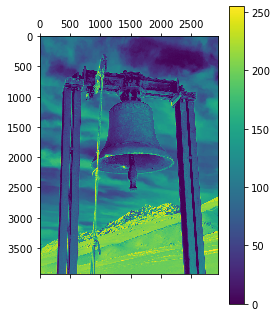

<Figure size 432x288 with 0 Axes>

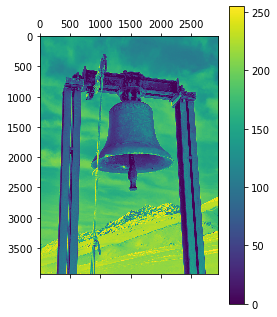

<Figure size 432x288 with 0 Axes>

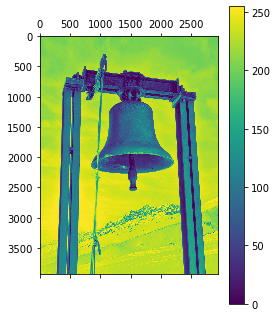

In [4]:
imgs = []
for file in os.listdir(path):
    if (os.path.splitext(file)[-1] != ".jpg"):
        continue
    img = Image.open(os.path.join(path,file))
    imgs.append(img)

# Transform template image into numpy array
img = imgs[1]    
# img.show()
img_array = np.asarray(img)

# View imageas array
for i in range(3):
    plt.figure()
    plt.matshow(img_array[:,:,i])
    plt.colorbar()

In [10]:
# Dimensions of template image as array
print(img_array.shape)

# Find integer number of pixel images that fits into height and width
print('height x width =',height,'x',width)
Nheight = img_array.shape[0] // height
Nwidth  = img_array.shape[1] // width
print('Nheight x Nwidth =',Nheight,'x',Nwidth)

# Crop template image so that integer number of pixel images fits into it in both directions 
# img_array = img_array[:Nheight*height,:Nwidth*width,:]
# plt.matshow(img_array[:,:,0])

(3840, 2880, 3)
height x width = 240 x 240
Nheight x Nwidth = 16 x 12


In [13]:
subregions = []

for h in range(Nheight):
    for w in range(Nwidth):
        
        subregion = img_array[h*height:(h+1)*height, w*width:(w+1)*width, :]
        subregions.append(subregion)
        

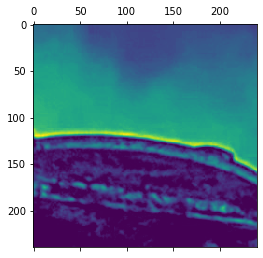

In [18]:
plt.matshow(subregions[30][:,:,0])

### Clustering

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def quantimage(image,k):
    i = np.float32(image).reshape(-1,3)
    condition = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,20,1.0)
    ret,label,center = cv2.kmeans(i, k , None, condition,10,cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    final_img = center[label.flatten()]
    final_img = final_img.reshape(image.shape)
    return final_img

In [1]:
names = os.listdir('/Users/dubcekt/MyDrive/MOSAIC/data_resized')
names = [image for image in names if image.endswith('g')]

images = []
for i in range(len(names)):
    image = cv2.imread(f'/Users/dubcekt/MyDrive/MOSAIC/data_resized/{names[i]}')
    images.append(image)
    plt.figure()
    plt.imshow(image[:,:,::-1])

In [2]:
names = os.listdir('/Users/dubcekt/MyDrive/MOSAIC/data_resized_eroded')
names = [image for image in names if image.endswith('g')]

images = []
for i in range(len(names)):
    image = cv2.imread(f'/Users/dubcekt/MyDrive/MOSAIC/data_resized_eroded/{names[i]}')
    images.append(image)
    plt.figure()
    plt.imshow(image[:,:,::-1])

In [3]:
for image in images:
    plt.figure()
    image_clustered = quantimage(image,3)
    plt.imshow(image_clustered[:,:,::-1])

## 3. Pattern matching

In [ ]:
# Find edges in each (subregion,pixel image(s)) pair
# For each subreagion, find the best match between a subregion and one pixel image

## 4. Results

In [ ]:
# For each (subregion,pixel image) pair, replace subregoin with an image.